In [1]:
from math import log
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

The odeint solver requires a callable function representing the right hand side of the IVP. Define the function predator_prey() that accepts the current r(t) and w(t) values as a 1d array y, and the current time t, and returns the right hand side of the predator-prey model as a tuple. Use $\alpha$ = 1.0, $\beta$ = 0.5, $\delta$ = 0.75, and $\gamma$ = 0.25 as your growth parameters.

In [2]:
def predator_prey(y, t):
    """Compute right hand side of Predator-Prey model based on rabbit and
    wolf populations at given time.
    
    Parameters:
        y ((2, ) ndarray): A vector representing rabbit and wolf populations 
            at time t.
        t (float): Current time.
        
    Returns:
        (tuple): A tuple corresponding to right hand side of the Predator-
            Prey model.
    """
    a,b,d,g = 1,0.5,0.75,0.25
    xr = y[0]*(a-b*y[1])
    xw = y[1]*(-d+g*y[0])
    return (xr,xw)

We'll use odeint to solve the predator-prey model ODE with initial conditions (r0 , w0 ) = (5, 3) and time ranging from 0 to 20 years. Then we'll display the resulting rabbit and wolf populations over time (stored as columns in the output of odeint) on the same plot.

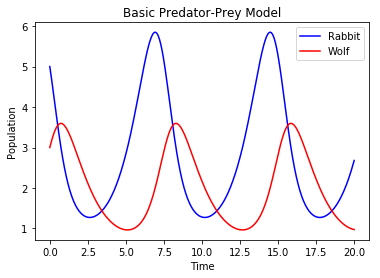

In [3]:
t=np.linspace(0,20,500)
y0 = np.array([5,3])
sol = odeint(predator_prey,y0,t)
#using the time period and initial values, solve the predator-prey ode and plot
fig = plt.figure()
plt.plot(t,sol[:,0],'b-',label='Rabbit')
plt.plot(t,sol[:,1],'r-',label='Wolf')
plt.legend(loc='best')
plt.title("Basic Predator-Prey Model")
plt.ylabel('Population')
plt.xlabel('Time')
plt.show()

Next we'll define the function Lotka_volterra() that takes in the current preditor and prey populations as a 1d array y and the current time as a float t and returns the right hand side of the Lotka-Volterra predator-prey model with $\eta$ = 1/3.

Using odeint, I'll solve the IVP with three different initial conditions $y_0 = (1/2, 1/3)$, $y_0 = (1/2, 3/4)$, and $y_0 = (1/16, 3/4)$ and time domain $t = [0, 13]$. Then I'll plot these three solutions on the same graph as the phase portrait and the equilibria (0, 0) and (1, 1).

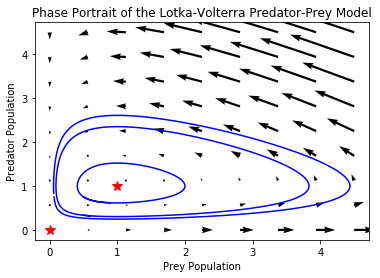

In [4]:
def Lotka_Volterra(y, t):
    """Compute right hand side of Lotka Volterra Predator-Prey model based 
    on rabbit and wolf populations at given time.
    
    Parameters:
        y ((2, ) ndarray): A vector representing rabbit and wolf populations 
            at time t.
        t (float): Current time.
        
    Returns:
        (tuple): A tuple corresponding to right hand side of the Lotka 
            Volterra Predator-Prey model.
    """
    n=1/3
    return (y[0]*(1-y[1]),y[1]*(y[0]-1)*n)

# For plotting phase portrait.
Y1, Y2 = np.meshgrid(np.linspace(0,4.5,25), np.linspace(0,4.5,25))
dU, dV = Lotka_Volterra((Y1, Y2), 0)
Q = plt.quiver(Y1[::3, ::3],Y2[::3, ::3],dU[::3, ::3],dV[::3, ::3])

#For the inital values on the time period t, solve the first ode and plot
t=np.linspace(0,13,500)
y01 = np.array([1/2,1/3])
sol1 = odeint(Lotka_Volterra,y01,t)
plt.plot(sol1[:,0],sol1[:,1],'b-')

#For the inital values on the time period t, solve the second ode and plot
y02 = np.array([1/2,3/4])
sol2 = odeint(Lotka_Volterra,y02,t)
plt.plot(sol2[:,0],sol2[:,1],'b-')

#For the inital values on the time period t, solve the third ode and plot
y03 = np.array([1/16,3/4])
sol3 = odeint(Lotka_Volterra,y03,t)
plt.plot(sol3[:,0],sol3[:,1],'b-')

#show the plots
plt.plot(0,0,'r*',ms=10)
plt.plot(1,1,'r*',ms=10)
plt.title("Phase Portrait of the Lotka-Volterra Predator-Prey Model")
plt.ylabel("Predator Population")
plt.xlabel("Prey Population")
plt.show()


We'll define a new function Logistic_Model() that takes in the current preditor and prey populations y and the current time t and returns the right hand side of the logistic predator-prey model as a tuple.

Using odeint, I'll compute solutions (U, V) of (1.3) for initial conditions (1/3, 1/3) and (1/2, 1/5) for parameter values $\eta$, $\rho$ = 1, 0.3 and also for values $\eta$, $\rho$ = 1, 1.1.

Finally, I'll create a phase portrait for the logistic equations using both sets of parameter values and plot the direction field, all equilibrium points, and both solution orbits on the same plot for each set of parameter values.

In [10]:
def Logistic_Model(y, t):
    """Compute right hand side of Logistic Predator-Prey model based on
    rabbit and wolf populations at given time.
    
    Parameters:
        y ((2, ) ndarray): A vector representing rabbit and wolf populations 
            at time t.
        t (float): Current time.
        
    Returns:
        (tuple): A tuple corresponding to right hand side of the Logistic 
            Predator-Prey model.
    """
    return (y[0]*(1-y[0]-y[1]),n*y[1]*(y[0]-p))

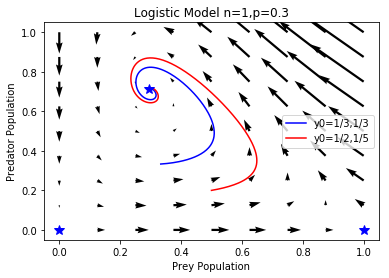

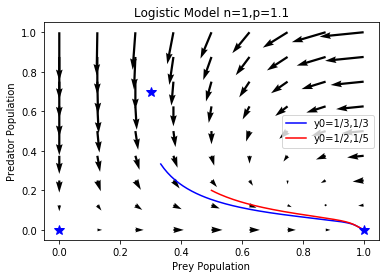

In [11]:
n,p=1,0.3

# For plotting phase portrait.
Y1, Y2 = np.meshgrid(np.linspace(0,1,25), np.linspace(0,1,25))
dU, dV = Logistic_Model((Y1, Y2), 0)
Q = plt.quiver(Y1[::3, ::3],Y2[::3, ::3],dU[::3, ::3],dV[::3, ::3])

t=np.linspace(0,23,500)
#get the solutions using odeint using the different starting points
sol1 = odeint(Logistic_Model,[1/3,1/3],t)
sol2 = odeint(Logistic_Model,[1/2,1/5],t)
#Plot them
plt.plot(sol1[:,0],sol1[:,1],'b-',label='y0=1/3,1/3')
plt.plot(sol2[:,0],sol2[:,1],'r-',label='y0=1/2,1/5')
plt.plot(1,0,'b*',ms=10)
plt.plot(0,0,'b*',ms=10)
plt.plot(sol1[-1,0],sol1[-1,1],'b*',ms=10)
plt.title("Logistic Model n=1,p=0.3")
plt.ylabel("Predator Population")
plt.legend(loc='best')
plt.xlabel("Prey Population")
plt.show()

n,p=1,1.1

# code for plotting phase portrait.
Y1, Y2 = np.meshgrid(np.linspace(0,1,25), np.linspace(0,1,25))
dU, dV = Logistic_Model((Y1, Y2), 0)
Q = plt.quiver(Y1[::3, ::3],Y2[::3, ::3],dU[::3, ::3],dV[::3, ::3])
#get the solutions with differnet n,p using odeint using the starting points
sol1 = odeint(Logistic_Model,[1/3,1/3],t)
sol2 = odeint(Logistic_Model,[1/2,1/5],t)
#plot the solutions
plt.plot(sol1[:,0],sol1[:,1],'b-',label='y0=1/3,1/3')
plt.plot(sol2[:,0],sol2[:,1],'r-',label='y0=1/2,1/5')
plt.plot(1,0,'b*',ms=10)
plt.plot(0,0,'b*',ms=10)
plt.plot(0.3,0.7,'b*',ms=10)
plt.title("Logistic Model n=1,p=1.1")
plt.ylabel("Predator Population")
plt.xlabel("Prey Population")
plt.legend(loc='best')
plt.show()


The function forbes() takes as input F(t) and returns Forbe’s equation. The function energy_balance() takes as input F (t), L(t), PAL, and EI and returns the energy balance as given in the lab. $\rho_F = 9400$, $\rho_L = 1800$, $\gamma_F =3.2$, $\gamma_L =22$, $\eta_F =180$, $\eta_L =230$, $\beta_{AT} =0.14$.


Using forbes() and energy_balance(), I'll define the function weight_odesystem() which takes as input the current fat and lean weights as an array y and the current time as a float t and return the right hand side of the weight change ODE as a tuple.

In [7]:
pf,pl = 9400,1800
def forbes(F):
    """Takes in F(t) and returns Forbe's equation"""
    C=10.4*pl/pf
    return C/(C+F)

gf,gl,nf,nl,bat = 3.2,22,180,230,0.14
K=0
def energy_balance(F,L,PAL,EI):
    """Takes in F(t),L(t),PAL, and EI. Returns the energy balance as given in the lab"""
    numerator = (1/PAL - bat)*EI -  K - gf*F - gl*L
    denominator = nf/pf*(1-forbes(F)) + nl/pl*forbes(F) + 1/PAL
    return numerator/denominator

def weight_odesystem(y,t):
    """Takes in y (current fat, lean weights) and time vector 
    & returns the right hand side of the weight change ODE as a tuple
    """
    df = (1-forbes(y[0]))*energy_balance(y[0],y[1],pal,ei)/pf
    dl = forbes(y[0])*energy_balance(y[0],y[1],pal,ei)/pl
    return (df,dl)

Consider the initial value problem corresponing to (1.4).

$\frac{dF}{dt} = \frac{(1−p(t))EB(t)}{\rho_F}$,

$\frac{dL}{dt} = \frac{p(t)EB(t)}{\rho_L}$,

$F(0) = F_0$, 

$L(0) = L_0$.

The function fat_mass() returns the fat mass of an individual based on body weight (kg), age (years), height (meters), and sex. I'll use this function to define initial conditions $F_0$ and $L_0$ for the IVP above: $F_0 =$ fat_mass($args^*$), $L_0 = BW − F_0$.

Suppose a 38 year old female, standing 5’8” and weighing 160 lbs, reduces her intake from 2143 to 2025 calories/day, and increases her physical activity from little to no exercise (PAL=1.4) to exercising to 2-3 days per week (PAL=1.5).


We'll use the original intake and phyical activity levels to compute K for this system. Then use odeint to solve the IVP and graph the solution curve for this single-stage weightloss intervention over a period of 5 years. 

Note the provided code requires quantities in metric units (kilograms, meters, days).

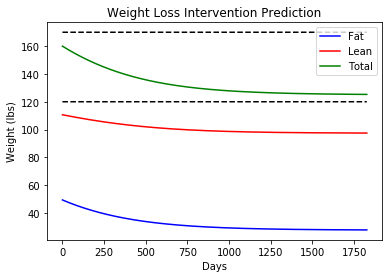

In [8]:
def fat_mass(BW, age, H, sex):
    BMI = BW / H**2.
    if sex == 'male':
        return BW * (-103.91 + 37.31 * log(BMI) + 0.14 * age) / 100
    else:
        return BW * (-102.01 + 39.96 * log(BMI) + 0.14 * age) / 100
#Gather facts abotu the individual    
BW,age,H,sex = 160*0.453592, 38, (5*12+8)*0.0254, 'female' #kg,age,meters
#calculate their inital Fat & lean mass
F0 = fat_mass(BW,age,H,sex)
L0 = BW-F0
#set the original PAL and EI, as well as the updated PAL and EI. Find K
PAL_orig = 1.4
EI_orig = 2143 #cal/day
pal = 1.5
ei = 2025
K = (1/PAL_orig-bat)*EI_orig-gf*F0-gl*L0
endTime = 365*5+1 #5 years in days
t=np.linspace(0,endTime,2000)
#solve for how their weight will change
solution = odeint(weight_odesystem,[F0,L0],t)

#plot the results
fig = plt.figure()
plt.title("Weight Loss Intervention Prediction")
plt.ylabel("Weight (lbs)")
plt.xlabel("Days")
plt.plot(t,solution[:,0]*2.20462,'b-',label="Fat")
plt.plot(t,solution[:,1]*2.20462,'r-',label="Lean")
plt.plot(t,(solution[:,0]+solution[:,1])*2.20462,'g-',label="Total")
plt.plot(t,np.ones_like(t)*170,'k--')
plt.plot(t,np.ones_like(t)*120,'k--')
plt.legend(loc='best')
plt.show()

The preceding problem will be modified to handle a two stage weightloss intervention: Suppose for the first 16 weeks intake is reduced from 2143 to 1600 calories/day and physical activity is increased from little to no exercise (PAL=1.4) to an hour of exercise 5 days per week (PAL=1.7). The following 16 weeks intake is increased from 1600 to 2025 calories/day, and exercise is limited to only 2-3 days per week (PAL=1.5).

I will need to recompute F0, and L0 at the end of the first 16 weeks, but K will stay the same.

(2000, 2)


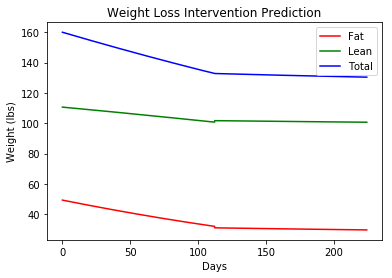

In [9]:
#get the initial fat and lean mass
BW,age,H,sex = 160*0.453592, 38, (5*12+8)*0.0254, 'female' #kg,age,meters
F0 = fat_mass(BW,age,H,sex)
L0 = BW-F0

#Stage 1. calculate harsh diet over 16 week period
PAL_orig = 1.4
EI_orig = 2143 #cal/day
pal = 1.7
ei = 1600
K = (1/PAL_orig-bat)*EI_orig-gf*F0-gl*L0
endTime = 16*7 #16 weeks in days
t1=np.linspace(0,endTime,2000)
solution1 = odeint(weight_odesystem,[F0,L0],t1)
print(np.shape(solution1))
#Recalculating F0, L0
BW = solution1[-1,0]+solution1[-1,1]
F0 = fat_mass(BW,age,H,sex)
L0 = BW-F0

#Stage 2. Calculate healthy diet over next 16 weeks
PAL_orig = 1.7
EI_orig = 1600 #cal/day
pal = 1.5
ei = 2025
t2=np.linspace(endTime+1,2*endTime,2000)
solution2 = odeint(weight_odesystem,[F0,L0],t2)

#concatenate the 2 solutions
solution = np.empty((4000,2))
solution[:2000] = solution1
solution[2000:] = solution2
t=np.linspace(0,2*endTime,4000)
#plot the solution
fig = plt.figure()
plt.title("Weight Loss Intervention Prediction")
plt.ylabel("Weight (lbs)")
plt.xlabel("Days")
plt.plot(t,solution[:,0]*2.20462,'r-',label="Fat")
plt.plot(t,solution[:,1]*2.20462,'g-',label="Lean")
plt.plot(t,(solution[:,0]+solution[:,1])*2.20462,'b-',label="Total")
plt.legend(loc='best')
plt.show()

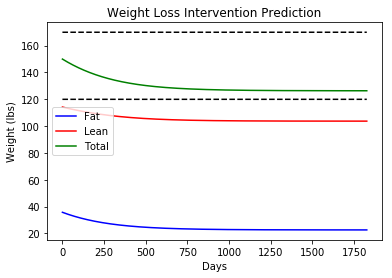

In [33]:
BW,age,H,sex = 150*0.453592, 23, (5*12+10)*0.0254, 'female' #kg,age,meters
#calculate their inital Fat & lean mass
F0 = fat_mass(BW,age,H,sex)
L0 = BW-F0
#set the original PAL and EI, as well as the updated PAL and EI. Find K
PAL_orig = 1.7
EI_orig = 2000 #cal/day
pal = 1.9
ei = 2000
K = (1/PAL_orig-bat)*EI_orig-gf*F0-gl*L0
endTime = 365*5+1 #5 years in days
t=np.linspace(0,endTime,2000)
#solve for how their weight will change
solution = odeint(weight_odesystem,[F0,L0],t)

#plot the results
fig = plt.figure()
plt.title("Weight Loss Intervention Prediction")
plt.ylabel("Weight (lbs)")
plt.xlabel("Days")
plt.plot(t,solution[:,0]*2.20462,'b-',label="Fat")
plt.plot(t,solution[:,1]*2.20462,'r-',label="Lean")
plt.plot(t,(solution[:,0]+solution[:,1])*2.20462,'g-',label="Total")
plt.plot(t,np.ones_like(t)*170,'k--')
plt.plot(t,np.ones_like(t)*120,'k--')
plt.legend(loc='best')
plt.show()